<h1><center><font size="25">Introducción a grafos y redes con Python</font></center></h1>

<center><b>Fernando Carazo</b></center>

<center><i>Enero, 2023</i></center>

## Introducción

Una de las últimas tendencias en el campo de la inteligencia artificial es *Graph Machine Learning*. Esta rama del machine learning se centra en aplicar algoritmos de analítica avanzada al estudio de redes o grafos.

Los grafos son estructuras de datos compuesta por nodos y enlaces que se utilizan para representar relaciones entre objetos. Si utilizamos el ejemplo de una red social, los nodos representarían a los usuarios y los enlaces la amistad o seguimiento entre los usuarios de dicha red social. Utilizando el Graph Machine Learning podremos realizar tareas como detectar los usuarios más populares, predecir futuras amistades o detectar comunidades de amigos con intereses parecidos.

En esta serie de artículos aprenderemos las bases del Graph Machine Learning y resolveremos problemas utilizando las librerías de grafos más importantes de Python como [NetworkX](https://networkx.org/) [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/), [Stellargraph](https://stellargraph.readthedocs.io/en/v0.8.3/quickstart.html) o [Graph Neural Networks](https://en.wikipedia.org/wiki/Graph_neural_network) (GNNs).

 <p align="center"><img src="../imagenes/00_Internet_map.jpg" style="width: 400px"></p>

<center><font size='2.5'>
<i>Mapa parcial de Internet basado en la información obtenida del sitio opte.org el 15 de enero de 2005. Cada linea dibujada entre dos nodos representa el enlace entre dos direcciones IP. La longitud de las líneas es proporcional al tiempo de espera entre los nodos. La imagen representa 30% de las redes accesibles en el año 2005.</i>
</font></center>


## Tipos de Grafos

Los grafos se desriben por sus nodos y los enlaces entre dichos nodos. El número total de nodos de un grafo se representa con la letra *N* y el número de links con la *L*. Existen varios tipos de grafos en relación al tipo de relación que existe entre sus nodos, cada uno de ellos permite modelar distintas problemas:

- **Grafos no dirigidos**: los enlaces no tienen dirección, es decir, si un nodo A está conectado a un nodo B, entonces B también está conectado a A. Un ejemplo de un grafo no dirigido podría ser una red social donde los usuarios están conectados entre sí a través de amistad.

<p align="center"><img src="../imagenes/10_grafo_no_dirigido_red_social.png" style="width: 400px"></p>

<center><font size='2.5'>
<i>Ejemplo de un red social, donde los nodos son usuarios y los ejes indican si existe una relación de amistad entre ellos. Es un grafo no dirigido porque las conexiones no tienen direccionalidad.</i>
</font></center>

- **Grafos dirigidos**: los enlaces tienen una dirección, es decir, si un nodo A está conectado a un nodo B, no necesariamente B estará conectado a A. Un ejemplo de un grafo dirigido podría ser una red de llamadas telefónicas donde los nodos son personas y los ejes muestran una llamada telefónica, teniendo en cuenta quién llama a quién. En este caso, es un grafo dirigido.


<p align="center"><img src="../imagenes/directed-network.png" style="width: 200px"></p>

<center><font size='2.5'>
<i>Grafo dirigido.</i>
</font></center>

- **Grafos ponderados**: los enlaces tienen un peso asociado, que representa la importancia o la intensidad de la relación entre los nodos. Un ejemplo de un grafo ponderado podría ser una red de ciudades donde los enlaces representan las rutas de transporte y el peso representa la distancia entre dos ciudades.

<p align="center"><img src="../imagenes/08_grafo-ciudades.png" style="width: 400px"></p>

<center><font size='2.5'>
<i>Ejemplo de un red de ciudades, donde los nodos son ciudades y los ejes la distancia entre ellas. Es un grafo ponderado.</i>
</font></center>

- **Grafos bipartitos**: los nodos se dividen en dos conjuntos disjuntos, y solo se permiten enlaces entre nodos de diferentes conjuntos. Un ejemplo de grafo bipartito podría ser una red de películas y actores, donde los nodos de un conjunto son las películas y los nodos del otro conjunto son los actores, y solo se permiten enlaces entre películas y actores (ya que un actor solo puede actuar en una película).



<p align="center"><img src="../imagenes/imdb-bipartite.png" style="width: 400px"></p>

<center><font size='2.5'>
<i>Ejemplo de un red de actores y peliculas, donde los nodos pueden ser de dos tipos: actores o películas. Por este motivo se denomina grafo bipartito.</i>
</font></center>

## Matriz de adyacencia

Para analizar un grafo es neceario representarlo de forma matemática. Existen dos formas principales de: la lista de adyacencia y la matriz de adyacencia. La lista de adyacencia simplemente es una lista en la que se indican todas las conexiones. Por ejemplo, si tenemos un grafo dirigido con tres nodos {A, B y C}, donde A se conecta con B y C, tendremos la lista de adyacencia {(A,B), (A,C)}. Si el grafo es no dirigido, la lista debe incluir las conexiones en ambas direcciones {(A,B), (B,A) (A,C), (C,A)}.

Otra forma de representar un grafo es mediante lo que se conoce como matriz de adyacencia. La matriz de adyacencia es una matriz de dimensión NxN, siendo N el número de nodos y donde aparece un 0 si la conexión entre un par de nodos no existe y un 1 si sí que existe. Para grafos ponderados, en vez de un 1, la matriz presentará el valor del peso de la conexión. Debido a sus propiedades matemáticas, la matriz de adyacencia es el método de representación de grafos más utilizado. 

La desventaja de la matriz de adyacencia, es que para grafos muy grandes, puede ocupar mucho espacio. Por este motivo, para grafos grandes se utiliza la *matriz de adyacencia sparse*, que internamente únicamente almacena la información de las conexiones existentes.

Para grafos no dirigidos la matriz de adyacencia es simétrica, ya que si existe la conexión entre los nodos A y B, también existirá la conexión recíproca.

<p align="center"><img src="../imagenes/05_adjacency_matrix.jpg" style="width: 400px"></p>

<center><font size='2.5'>
<i>Ejemplo de un grafo y su matriz de adyacencia. Al ser un grafo no dirigido, la matriz es simétrica.</i>
</font></center>


Con una formulación matetemática, la matriz de adyacencia de una red dirigida de $\mathrm{N}$ nodos tiene $\mathrm{N}$ filas y $\mathrm{N}$ columnas, siendo sus elementos:

- $A_{i j}=1$ si hay un enlace que apunta desde el nodo $j$ al nodo $i$
- $A_{i j}=0$ si los nodos $i$ y $j$ no están conectados entre sí

La matriz de adyacencia de una red no dirigida tiene dos entradas para cada enlace. el enlace $(1,2)$ se representa como $A_{12}$ $=1$ y $A_{21}=1$. Por lo tanto, la matriz de adyacencia de una red no dirigida es simétrica, $A_{i j}=A_{j i}.$

En la siguiente figura se representan los distintos tipos de grafos junto con sus matrices de adyacencia. Como se puede observar, los grafos dirigidos (B) son los únicos que no tienen una matriz de adyacencia simétrica. Por otro lado, los grafos bipartitos (D) se pueden proyectar para obtener las conexiones indirectas entre cada tipo de nodo (E), esto último se verá en profundidad más adelante.

<p align="center"><img src="../imagenes/01_tipos_de_grafos.jpg" style="width: 900px"></p>

<center><font size='2.5'>
<i>Ejemplo de grafos de distintos tipos con sus matrices de adyacencia correspondientes. A) Grafo no dirigido. B) Grafo dirigido. C) Grafo ponderado. D) Grafo bipartito, con dos tipos de nodos (verde y naranja). E) Proyección del grafo bipartito en los nodos de cada tipo. Fuente: wikipedia.</i>
</font></center>

## Meta-información de nodos y ejes.

Cuando se trabaja con grafos, especialmente si se quieren hacer predicciones u otro tipo de analítica, es muy común que dispongamos de información adicional de los nodos y enlaces. Esta información se denomina meta-información porque no pertenece estrictamente al grafo, y se almacena como un DataFrame cuyas filas son los nodos o enlaces y sus columnas son las variables disponibles de cada nodo o enlace. Si se utiliza el ejemplo de la red social, la meta-información de los nodos podría ser: nombre, edad, aficiones, etc. 

Aunque es mucho menos común que en los nodos, los enlaces también pueden tener meta-información. Continuando con el ejmplo de la red social, la meta-información de los ejes podría ser el año en el que se inición la relación de amistad entre dos personas.

## Grafos Bipartitos

Un grafo bipartito es una red cuyos nodos se pueden dividir en dos conjuntos disjuntos U y V de tal manera que cada enlace conecta un nodo U con un nodo V. En otras palabras, si coloreamos los nodos U de verde y los nodos V de morado, entonces cada enlace debe conectar nodos de diferentes colores.



<p align="center"><img src="../imagenes/11_grafo bipartito.jpg" style="width: 900px"></p>

<center><font size='2.5'>
<i>Ejemplo de grafo bipartito. Fuente: Network Science - Albert-László Barabási.</i>
</font></center>




Podemos generar dos proyecciones para cada red bipartita. La primera proyección conecta dos nodos U con un enlace si están conectados con el mismo nodo V en la representación bipartita. La segunda proyección conecta los nodos V con un enlace si se conectan con el mismo nodo U.

En la teoría de redes nos encontramos con numerosas redes bipartitas. Un ejemplo conocido es la red de actores de Hollywood, en la que un conjunto de nodos corresponde a las películas (U) y el otro a los actores (V). Una película está conectada a un actor si el actor actúa en esa película. Una proyección de esta red bipartita es la red de actores, en la que dos nodos están conectados entre sí si han actuado en la misma película. La otra proyección es la red de películas, en la que dos películas están conectadas si comparten al menos un actor en su reparto.

## Caminos y distancias

La distancia física desempeña un papel clave en las interacciones entre los componentes de los sistemas. Por ejemplo, la distancia física entre dos ciudades influye al número de visitantes que viajan de una ciudad a otra.

En las redes, la distancia es un concepto diferente a la distancia física. Si se plantea la pregunta: ¿Cuál es la distancia entre dos usuarios de una red social? La distancia física deja de ser relevante porque dos individuos que viven en el mismo edificio pueden no conocerse y tener muy buenos amigos en otras partes del mundo.

En las redes, la distancia física se reemplaza por la longitud del camino. Un camino entre dos nodos es una ruta que se inicia en el primer nodo y recorre los enlaces de la red pasando por distintos nodos hasta llegar al segundo nodo. La longitud del camino representa el número de enlaces que contiene el camino entre dos nodos.

En la ciencia de las redes, los caminos desempeñan un papel central. A continuación, discutimos algunas de sus propiedades más importantes:

### Reciprocidad

En una red no dirigida dij = dji, es decir, la distancia entre el nodo i y el nodo j es la misma que la distancia entre el nodo i y el nodo j. En una red dirigida, a menudo dij ≠ dji. Además, en una red dirigida, la existencia de un camino desde el nodo i al nodo j no garantiza la existencia de un camino desde j a i.


### Camino más corto entre dos nodos

En las redes reales, a menudo necesitamos determinar la distancia entre dos nodos, lo que equivale en determinar el camino más corto entre dichos nodos.

La distancia (o camino más corto) $d_{i j}$ entre dos nodos ($i$ y $j$) se pueden calcular directamente a partir de la matriz de adyacencia $A_{i j}$. Basta con multiplicar la matriz de adyacencia por sí misma tantas veces como distancia entre dos nodos.

- $d_{i j}=1$: Si hay un enlace directo entre $i$ y $j$, entonces $A_{i j}=1$ ( $A_{i j}=0$ de lo contrario $)$

- $d_{i j}=2$: Si hay un camino de longitud 2 entre $i$ y $j$, entonces $A_{i k} A_{k j}=1\left(A_{i k} A_{k j}=0\right.$ de lo contrario). La cantidad de caminos $d_{i j}=2$ entre $i$ y $j$ es

$$
N_{i j}^{(2)}=\sum_{k=1}^N A_{i k} A_{j k}=A_{i j}^2
$$
​
 La cantidad de caminos de longitud $d$ entre $i$ y $j$ es
​
 $$
N_{i j}^{(d)}=A_{i j}^d
$$

Estas ecuaciones son válidas tanto para redes dirigidas como no dirigidas. 

En otras palabras, para obtener la distancia de orden 2 entre cualquier par de nodos, basta con multiplicar la matriz de adyacencia por sí misma. Si la multiplicamos por sí misma `n` veces, obtenemos la matriz de distancias de orden `n`. 

Así, la matriz de distancia de orden 2 nos mostrará todos los pares de nodos que están conectados con un nodo intermedio. En el ejemplo, los nodos `2` y `5` tienen entre medias los nodos `4` y `1`, es decir, existen dos caminos posibles de orden 2 que los conectan: el `2-4-5` y el `2-1-5`. Por ese motivo, si se multiplica la matriz de adyacencia por sí misma, encontraremos que el elemento [2,5] de la matriz de distancias es 2. Lo que quiere decir que existen dos caminos de distancia 2 entre los nodos 2 y 5.

<p align="center"><img src="../imagenes/05_adjacency_matrix.jpg" style="width: 400px"></p>

<center><font size='2.5'>
<i>Ejemplo de un grafo y su matriz de adyacencia. Al ser un grafo no dirigido, la matriz es simétrica.</i>
</font></center>

## Propiedades de redes y nodos

A continuación, se enuncian algunas propiedades importantes de las redes y nodos en teoría de grafos. En artículos sucesivos se explicarán con más detalle con su formulación e implicaciones matemáticas. 

1. **Grado de un nodo**: el número de enlaces que tiene un nodo. Los grafos dirigidos presentan dos tipos de grado "in degree" para conexiones entrantes y "out degree" para conexiones salientes.

2. **Vecindario de un nodo**: los nodos a los que está conectado directamente un nodo.

3. **Grado medio**: el promedio del grado de todos los nodos en una red.

4. **Densidad**: el número de enlaces en una red dividido por el número máximo de enlaces posibles. La densidad da una idea de como de poblada de enlaces está la red.

5. **Componentes conectadas**: grupos de nodos conectados entre sí (no tienen porqué existir todas la conexiones, pero sí que desde cualquier nodo puedas viajar al resto de nodos).

6. **Caminos y ciclos**: un camino es una secuencia de enlaces que conectan dos nodos, mientras que un ciclo es un camino que comienza y termina en el mismo nodo.

7. **Centralidad**: medida de la importancia de un nodo en una red, según su grado, vecindario, caminos y ciclos, entre otros factores.

8. **Clustering**: la medida de la cantidad de enlaces existentes entre los vecinos de un nodo.

9. **Cliqué**: conjunto de nodos todos conectados con todos.

10. **Sub-grafo**: la red resultante al filtrar una serie de nodos dados como input.

## Importancia de los nodos: Centralidad de los nodos

La centralidad es un concepto utilizado para medir la importancia de los nodos en un grafo. Las tres medidas de centralidad más importantes son:

1. **Centralidad de grado**: la medida más simple, se basa en el número de enlaces que tiene un nodo. Es el número de enlaces que entran y salen de un nodo.

2. **Centralidad de intermediación**: mide la cantidad de caminos que pasan por un nodo.

3. **Centralidad de cercanía**: mide la distancia promedio desde un nodo a todos los demás nodos del grafo.

Para más detalle de las propiedades de los grafos, puedes visitar el siguiente capítulo de la serie XX.

## Introducción a grafos con NetworkX

[NetworkX](https://networkx.org/) es una librería de Python que se utiliza para trabajar con grafos y redes. Con NetworkX, puedes crear, manipular y analizar grafos de manera eficiente.

Una de las principales ventajas de NetworkX es su capacidad para trabajar con grafos de gran tamaño y complejidad. Puede manejar grafos con millones de nodos y enlaces, y proporciona herramientas para analizar las propiedades de estas redes. La librería cuenta con una gran variedad de funciones para crear grafos, desde grafos aleatorios hasta grafos a partir de archivos. También se pueden importar y exportar grafos en una variedad de formatos, como GML, GraphML y adjacency list.

Una vez creado el grafo, NetworkX proporciona una amplia variedad de funciones para analizarlo. Por ejemplo, se pueden calcular medidas como el grado medio, la densidad, el coeficiente de clustering, el camino más corto entre dos nodos, y muchas otras más. Además, se cuenta con una serie de algoritmos para buscar patrones en los datos, como la detección de comunidades, detección de centralidad y detección de componentes conectados. Todas estas propiedades se irán viendo en artículos sucesivos.

NetworkX también es compatible con otras librerías de Python, como NumPy, SciPy, Matplotlib o Pytorch, lo que permite integrar fácilmente el análisis de redes en un flujo de trabajo de análisis de datos más amplio.



## Funciones importantes de la librería NetworkX

A continuación se muestra un resúmen las funciones más importantes de la NetworkX. 

1. **Creación de grafos**: NetworkX permite crear grafos vacíos o con nodos y enlaces específicos utilizando funciones como `Graph()` (grafos no dirigidos), `DiGraph()` (grafos dirigidos), o incluso para conjuntos de grafos con `MultiGraph()`, y `MultiDiGraph()`.

2. **Agregar nodos y enlaces**: Se pueden agregar nodos y enlaces a un grafo existente de forma manual con: `add_node()`, `add_edge()`. O desde una lista: `add_nodes_from()`  y `add_edges_from()`. o desde un archivo o DataFrame: `from_pandas_edgelist()`. Para grafos ponderados se utiliza la función `add_weighted_edges_from`.

3. **Información del grafo**: Se pueden obtener información básica del grafo, como el número de nodos y enlaces, utilizando funciones como `number_of_nodes()`, `number_of_edges()`. Utilizando `nodes()` y `edges()` se accede a la meta-información de nodos y ejes.

4. **Vecinos y grado**: Se pueden obtener los vecinos de un nodo y el grado de un nodo utilizando las funciones: `neighbors()`, `degree()`, y el grado para redes dirigidas: `in_degree()`, y `out_degree()`.

5. **Centralidad**: Se pueden calcular medidas de centralidad, como la centralidad de grado, la centralidad de intermediación, y la centralidad de entre los nodos utilizando funciones como `degree_centrality()`, `betweenness_centrality()`, y `closeness_centrality()`.

6. **Componentes conectadas**: Se pueden encontrar las componentes conectadas de un grafo utilizando la función `connected_components()`.

7. **Lectura y escritura de archivos**: NetworkX permite leer y escribir grafos en varios formatos de archivo utilizando funciones como `read_edgelist()`, `write_edgelist()`, `read_adjlist()`, y `write_adjlist()`.

8. **Algoritmos de optimización**: NetworkX tiene integrados algoritmos de optimización como el camino más corto y el flujo máximo, utilizando funciones como `shortest_path()`, `dijkstra_path()`.

9. **Subgrafos**: Se pueden obtener subgrafos de un grafo utilizando funciones como `subgraph()`, dando una lista de nodos como input.

10. **Operaciones de conjunto**: NetworkX permite realizar operaciones de conjunto en grafos, como la unión, la intersección y la diferencia utilizando funciones como `union()`, `intersection()`, y `difference()`.

11. **Matriz de adyacencia**: Con la función `nx.adjacency_matrix(G)` se obtiene la matriz de adyacencia de un grafo. Por defecto está en formato *sparse*, para verla por pantalla hay que utilizar la función `to_dense()` de numpy.

12. **Dibujado de grafos**: NetworkX permite dibujar grafos utilizando una interfaz de dibujo externo como Matplotlib, utilizando la función `draw()`.



## Creación de redes con Python NetworkX

NetworkX permite crear redes de manera manual, añadiendo los nodos y ejes uno por uno o desde un archivo o un DataFrame que contenga las conexiones. Esto es especialmente útil cuando se trabaja con datos de redes que ya han sido recopilados y se encuentran en un formato estructurado.

#### Creación de un grafo de forma manual

In [2]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Para crear un grafo en NetworkX, se debe crear un objeto de tipo "Grafo" utilizando la función `nx.Graph()`. Esta función crea un grafo vacío, sin nodos ni ejes, al que se pueden agregar elementos más adelante.

In [16]:
# Creación de una instancia tipo "Grafo"
# ======================================================================================
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


Una vez que el objeto Grafo ha sido creado, se puede poblar con nodos y conexiones. Para ello se utilizan dos métodos:

+ `add_node`: añade un único nodo al grafo.

+ `add_nodes_from`: añade multiples nodos al grafo.

+ `add_edge`: añade un eje entre los nodos *u* y *v*. Si los nodos no existen, se crean y añaden automáticamente al grafo.

+ `add_edges_from`: mismo comportamiento que `add_edge` pero utilizando una colección de ejes. Cada eje se define con una tupla (*u*, *v*).
nx.adjacency_matrix

*Nota: El nombre de los nodos puede ser tanto de numérico como caracteres.*

Graph with 1 nodes and 0 edges


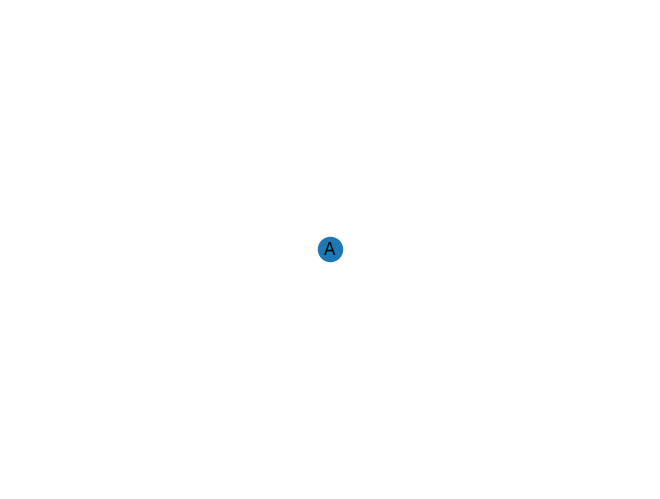

In [17]:
# Añadir un único nodo
# ======================================================================================
G.add_node("A")
nx.draw(G, with_labels=True)
print(G)

Graph with 3 nodes and 0 edges


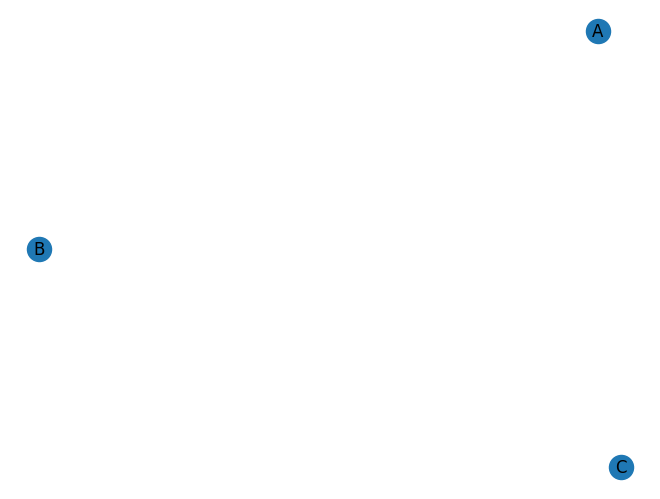

In [18]:
# Añadir multiples nodos 
# ======================================================================================
G.add_nodes_from(["B", "C"])
nx.draw(G, with_labels=True)
print(G)

Graph with 3 nodes and 1 edges


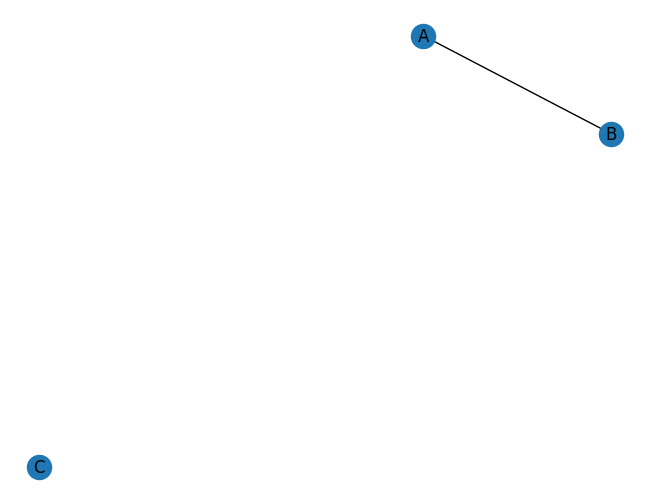

In [19]:
# Añadir un único eje
# ======================================================================================
G.add_edge("A", "B")
nx.draw(G, with_labels=True)
print(G)

Graph with 3 nodes and 3 edges


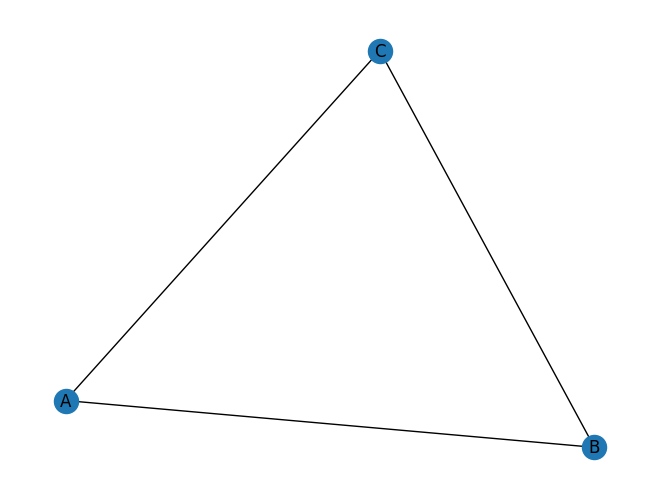

In [20]:
# Añadir múltiples ejes
# ======================================================================================
G.add_edges_from([("A", "C"), ("B", "C")])
nx.draw(G, with_labels=True)
print(G)

Si se añade una conexión cuyos nodos no existen, se crean automáticamente.

Graph with 6 nodes and 5 edges


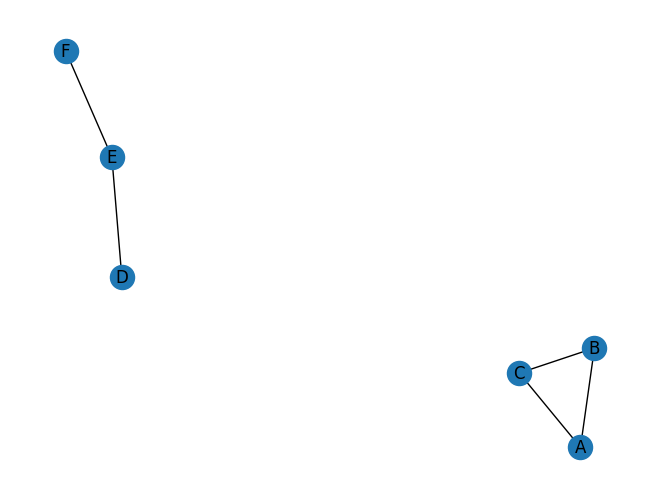

In [21]:
G.add_edges_from([("D", "E"), ("E", "F")])
nx.draw(G, with_labels=True)
print(G)

In [24]:
print(G.number_of_edges())
print(G.number_of_nodes())


5
6


La información de los nodos y ejes del grafo está almacenada en los attributos `nodes` y `edges`. Si te fijas, el atributo `edges` ¡es la lista de adyacencia!


In [11]:
print(f"Nodos del grafo: {G.nodes}")
print(f"Ejes del grafo: {G.edges}")

Nodos del grafo: ['A', 'B', 'C', 'D', 'E', 'F']
Ejes del grafo: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F')]


Como se ha explicado anteriormente, los enlaces de los grafos dirigidos tienen una dirección definida. Los enlaces de estos grafos se representan con una flecha. La matriz de adyacencia de los grafos dirigidos no es simétrica. En vez de `Graph`, utilizaremos el objeto `DiGraph`

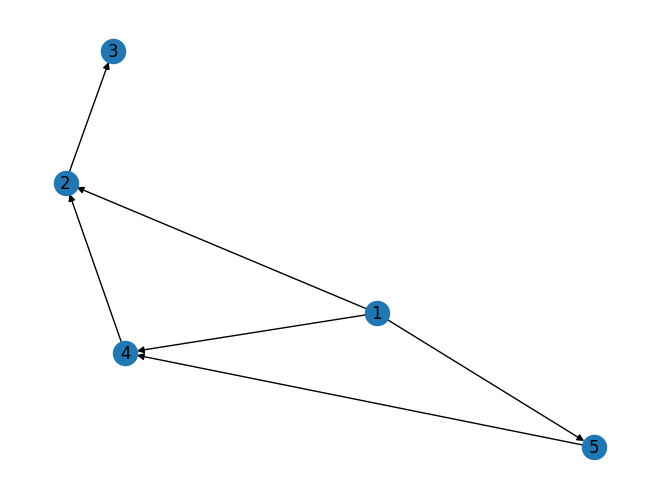

In [13]:
# Creamos una instancia tipo "Grafo dirigido".
G = nx.DiGraph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])

# Dibujamos la red. Más adelante daremos más detalles sobre representación de grafos.
nx.draw(G, with_labels=True)

### Creación desde un DataFrame

Para crear un grafo a partir de un dataframe de pandas, la información tiene que estar estructurada de tal forma una columna que represente el incio de cada eje y otra el destino. Por ejemplo, para representar que existen dos nodos ("A" y "B") conectados entre si, se necesita una fila que contenga el valor "A" en una columna y "B" en otra. Esta información es suficiente para que se creen los dos nodos y la conexión entre ambos.

In [14]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame({
                "inicio": ["A", "B", "C"],
                "fin": ["C", "C", "D"],
            })
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D


A partir de ahí, utilizamos la función `from_pandas_edgelist` indicando la columna de origen y destino (para grafos no dirigidos, se elige un origen indistintamente).

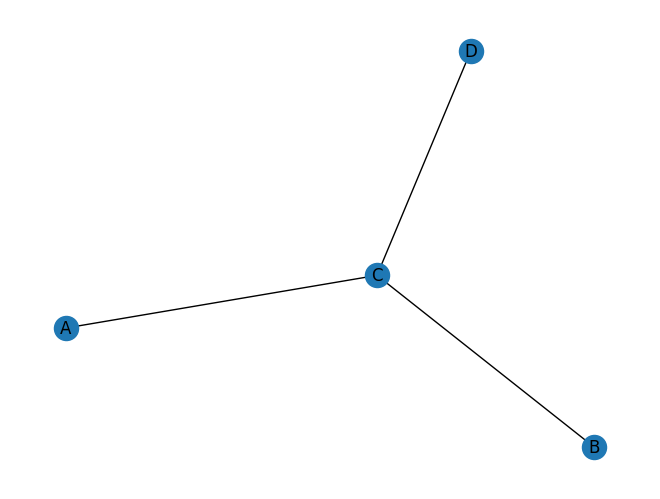

In [15]:
# Crear un grafo a partir de un Dataframe
# ======================================================================================
G = nx.from_pandas_edgelist(
        conexiones,
        source = "inicio",
        target = "fin"
    )
nx.draw(G, with_labels=True)

En el ejemplo anterior, el grafo no es dirigido, es decir, la conexión ("A", "B") es equivalente a ("B", "A"). Tambien es posible crear un grafo dirigido donde la conexión tiene una dirección específica (detalles más adelante). Para ello, en vez de utilizar el objeto `nx.Graph()` utilizaremos `nx.DiGraph()`.

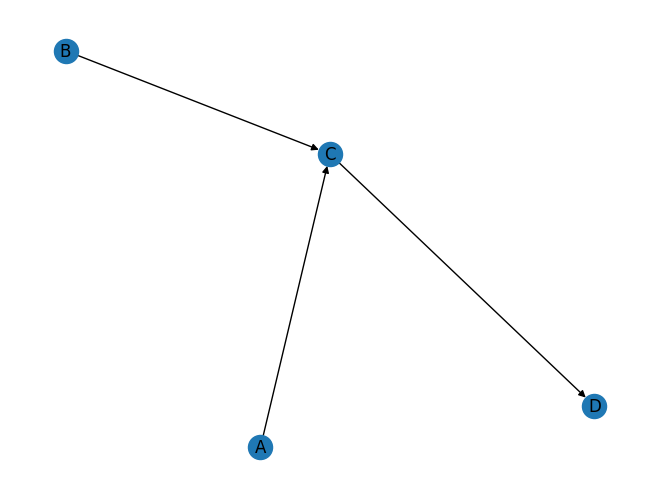

In [14]:
# Crear un grafo dirigido a partir de un Dataframe
# ======================================================================================
G = nx.from_pandas_edgelist(
    conexiones,
    source       = "inicio",
    target       = "fin", 
    create_using = nx.DiGraph
)
nx.draw(G, with_labels=True)

In [16]:
# neighbors
nx.to_dict_of_lists(G)

adjM = nx.adjacency_matrix(G)

# Pasamos de matriz sparse a dense para poder imprimirla por pantalla
adjM = adjM.todense()
adjM

matrix([[0, 1, 0, 0],
        [1, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])

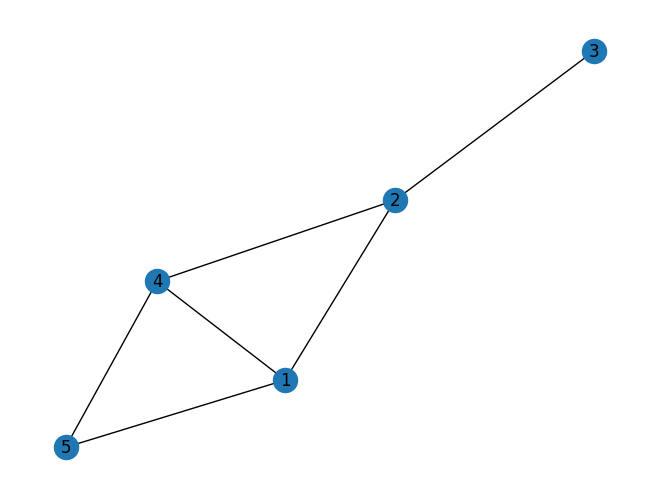

In [15]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])

# Dibujamos la red. Más adelante daremos más detalles sobre representación de grafos.
nx.draw(G, with_labels=True)

In [18]:
distancias_orden_dos = adjM*adjM

print(distancias_orden_dos)
# elemento 2,5 en python, se resta uno a los índices
print(f"Caminos de orden dos entre los nodos 2 y 5 = {distancias_orden_dos[1,4]}")

[[3 1 1 2 1]
 [1 3 0 1 2]
 [1 0 1 1 0]
 [2 1 1 3 1]
 [1 2 0 1 2]]
Caminos de orden dos entre los nodos 2 y 5 = 2


In [20]:
adjM = nx.adjacency_matrix(G)
adjM.todense()

matrix([[0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0]])

### Grafo ponderado

En un grafo ponderado, los ejes del grafo tienen un peso asociado. Los ejes de estos grafos se suelen representar con una anchura distinta en función del peso. Ejemplo: Red social, donde el peso es el número de interacciones entre dos usuarios.



In [21]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_weighted_edges_from([(1, 2, 0.5), (2,3, 0.9), (1, 4, 0.1), (1, 5, 0.75), (4,2, 0.01), (5,4, 0.3)])

G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

Como podemos ver, ahora los ejes tienen el atributo weight.

En el siguiente apartado explicaremos más detalles de los atributos asociados a nodos y ejes.

### Grafo bipartito

Si los nodos de un grafo representan entidades de distinta naturaleza se denominan grafos bipartitos. Un ejemplo común de grafos bipartitos son las redes de publicaciones donde existen nodos de tipo "artículo" y otros de tipo "escritor". En el grafo existirá un eje cuando un escritor publique un artículo. 

En este tipo de grafos, las conexiones únicamente puden ocurrir entre nodos de distinta naturaleza (no pueden existir conexiones entre artículos entre sí).

En los grafos bipartitos se habla de proyecciones cuando se quiere es que se pueden realizar "proyecciones" (Grafos "E"). Esto es construir un grafo para cada uno de los tipos de nodos en función de sus conexiones comunes. Más adelante veremos un ejemplo completo de estos grafos.


> Un grafo puede tener cualquier combinación de estas características: por ejemplo, podemos tener un grafo simple, dirigido y ponderado

Los grafos bipartitos son unos de los tipos de grafos más utilizados en el Graph Machine Learning. En el siguiente enlace encontrarás un case study con Grafos Bipartitos [proximamente].

# Atributos de nodos y ejes



Supongamos que estamos analizando los datos de una red social, en el que los nodos son usuarios y los ejes representan si dos usuarios son amigos.

1. En este caso puede ser que queramos guardar información relativa a los usuarios, como por ejemplo:

    - Nombre y apellidos.
    - Edad.
    - Profesión.
    - Aficiones.

    Los atributos de los nodos se añaden con el método `networkx.set_node_atributes(Grafo, diccionario, nombre)`


2. Por otro lado, los ejes puede ser que también tengan atributos:

    - Fecha en la que inició la amistad.
    - Intensidad de la amista (weight)

    Los atributos de los ejes se añaden con el método `networkx.set_edge_atributes()`

Los atributos de nodos y ejes son muy importantes en el Graph Machine Learning. De hecho, las Graph Neural Networks utilizan atributos de ejes y nodos para hacer predicciones. 

> Por ejemplo, si queremos predecir futuras amistadas entre usuarios, será interesante tener en cuenta las aficiones de cada usuario: (Será más probable que usuarios con aficiones similares se hagan amigos en un futuro).


In [ ]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])


G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (2, 4, {}), (4, 5, {})])

In [ ]:
# Añadimos atributos de los nodos
node_name = {
    1:"Jaime",
    2:"María",
    3:"Julio",
    4:"Rosa",
    5:"Alberto"
}

node_aficiones = {
    1:["Futbol"],
    2:["Baile", "Pádel"],
    3:["Golf", "Baile"],
    4:["Cocina"],
    5:["Cocina", "Jamón"]
}

nx.set_node_attributes(G, node_name, name="Nombre")
nx.set_node_attributes(G, node_aficiones, name="Aficiones")

# Añadimos atributos de los ejes
edges_weight = {
    (1, 2): 0.5, 
    (2,3): 0.9, 
    (1, 4): 0.1, 
    (1, 5): 0.75, 
    (4,2): 0.01, 
    (5,4): 0.3
}

nx.set_edge_attributes(G, edges_weight, name="weight")



Para acceder a los atributos de nodos y ejes utilizamos `G.nodes(data=True)` o `G.edges(data=True)`. 
Estos comandos nos devuelven una objeto de nodos/ejes con un diccionario asociado con todos los atributos.

En nuestro caso, los nodos no contienen ningún atributo todavía.

In [ ]:
G.nodes(data=True)

NodeDataView({1: {'Nombre': 'Jaime', 'Aficiones': ['Futbol']}, 2: {'Nombre': 'María', 'Aficiones': ['Baile', 'Pádel']}, 3: {'Nombre': 'Julio', 'Aficiones': ['Golf', 'Baile']}, 4: {'Nombre': 'Rosa', 'Aficiones': ['Cocina']}, 5: {'Nombre': 'Alberto', 'Aficiones': ['Cocina', 'Jamón']}})

In [ ]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

> TRUCO: los atributos de ejes y nodos se pueden iterar directamente como si se tratase de un diccionario!

In [ ]:
[print(f"Eje que conecte el nodo {m} con el nodo {n} y tiene un peso de {w['weight']}.") for m, n, w in G.edges(data=True)]

Eje que conecte el nodo 1 con el nodo 2 y tiene un peso de 0.5.
Eje que conecte el nodo 1 con el nodo 4 y tiene un peso de 0.1.
Eje que conecte el nodo 1 con el nodo 5 y tiene un peso de 0.75.
Eje que conecte el nodo 2 con el nodo 3 y tiene un peso de 0.9.
Eje que conecte el nodo 2 con el nodo 4 y tiene un peso de 0.01.
Eje que conecte el nodo 4 con el nodo 5 y tiene un peso de 0.3.


[None, None, None, None, None, None]

> EJERCICIO: qué ejes tienen un peso mayor que 0.5?

In [ ]:
threshold = 0.5
edge_list = [
    (n, m) for n, m, d in G.edges(data=True) if d["weight"] >= threshold
]

edge_list

[(1, 2), (1, 5), (2, 3)]

Y don un subset de ejes, podemos filtrar el grafo:

[(1, 2), (1, 5), (2, 3)]


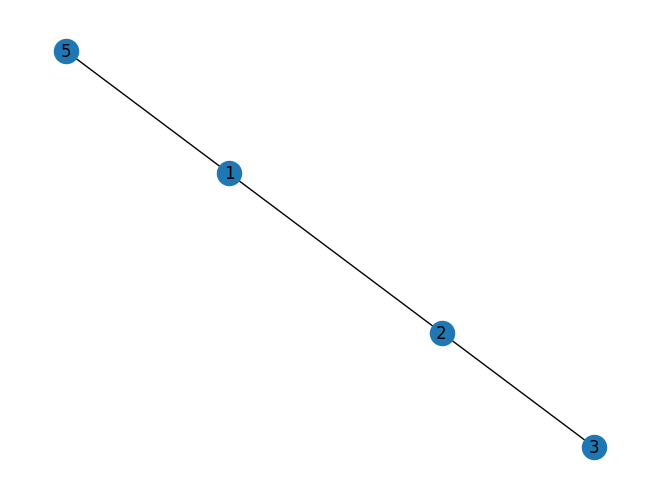

In [ ]:
G_filtrado = G.edge_subgraph(edge_list)
print(G_filtrado.edges)
nx.draw(G_filtrado, with_labels=True)


## Caso de estudio

In [2]:
# Instalación de librerías
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nf


warnings.filterwarnings('ignore')

# leemos el dataframe
facebook = pd.read_csv("../data/facebook_combined.txt", header=None, sep=" ",names=["user_1", "user_2"])

facebook = facebook[:2000]


G = nx.from_pandas_edgelist(facebook, source="user_1", target="user_2")

In [3]:
print(nx.info(G))

Graph with 713 nodes and 2000 edges


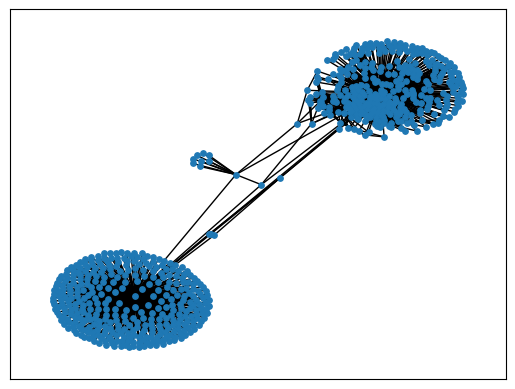

In [34]:
spring_pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=spring_pos, with_labels=False, node_size=15)


In [ ]:
nf.visualize(G)

![](../imagenes/Facebook-nf.png)

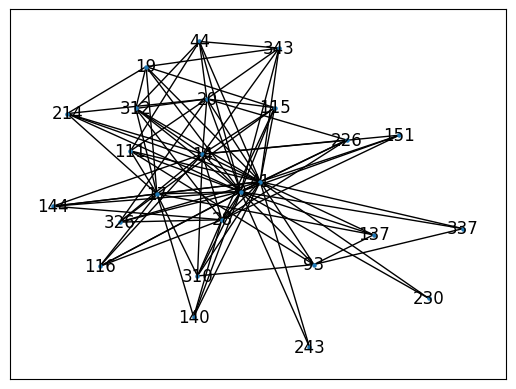

In [44]:
n = G.neighbors(41,)
n =[x for x in n] + [41]
sg = G.subgraph(n)
nx.draw_networkx(sg,  with_labels=True, node_size=5)

In [48]:
nx.shortest_path(sg, 140, 115,)
nx.shortest_path(sg, 93, 137,)

[93, 137]

In [29]:
degree = nx.degree(G)

degree[0], degree[41]

# Neighbors

subgraph = G.subgraph(41)


## Información de sesión

In [ ]:
from sinfo import sinfo
sinfo()

## Bibliografía
<br>
Network Science - Albert-László Barabási

https://towardsdatascience.com/graph-machine-learning-with-python-pt-1-basics-metrics-and-algorithms-cc40972de113

https://towardsdatascience.com/graph-machine-learning-with-python-pt-2-random-graphs-and-diffusion-models-of-cryptopunks-trading-99cd5170b5ea

https://towardsdatascience.com/graph-machine-learning-with-python-part-3-unsupervised-learning-aa2854fe0ff2

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/

http://networksciencebook.com/


**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Graph Machine Learning: Grafos by Fernando Carazo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by Fernando Carazo is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    #font-size: 16px;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    #font-size: 1em;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>